### Name: Divya Sagar Reddy
### CWID: 10476472

In [1]:
import numpy as np

class LogisticRegression:
    
    def __init__(self, lr, n_iters):
        self.lr = lr
        self.n_iters = n_iters
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y, div):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        for i in range(self.n_iters):
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)
            if i % div == 0:
                print(f'Loss: {np.mean(-(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)))}, Accuracy: {accuracy_score(y, np.round(y_pred))}')
            errors = y_pred - y
            self.weights -= self.lr * np.dot(X.T, errors)
            self.bias -= self.lr * np.sum(errors)
        
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return np.where(self.sigmoid(z) >= 0.5, 1, 0)

In [2]:
class LDA:
    def __init__(self):
        self.projection_vector = None
    
    def fit(self, X, y):
        # Split the input data into two classes
        X0 = X[y == 0]
        X1 = X[y == 1]

        # Calculate the mean vectors for each class
        mean0 = np.mean(X0, axis=0)
        mean1 = np.mean(X1, axis=0)

        # Calculate the covariance matrices for each class
        cov0 = np.cov(X0.T)
        cov1 = np.cov(X1.T)

        # Calculate the pooled within-class covariance matrix
        Sw = cov0 + cov1

        # Calculate the between-class covariance matrix
        Sb = np.outer((mean1 - mean0), (mean1 - mean0))

        # Solve the eigenvalue problem for the (Sw^-1)Sb matrix
        eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))

        # Sort the eigenvectors by decreasing eigenvalues
        idxs = eig_vals.argsort()[::-1]
        eig_vals = eig_vals[idxs]
        eig_vecs = eig_vecs[:, idxs]

        # Choose the eigenvector corresponding to the largest eigenvalue as the projection vector
        self.projection_vector = eig_vecs[:, 0]

    def predict(self, X):
        # Project the input data onto the projection vector
        proj = X.dot(self.projection_vector)

        # Classify the data based on the sign of the projection
        return np.where(proj < np.mean(proj), 0, 1)

In [3]:
class Perceptron:
    
    def __init__(self, lr, n_iters):
        self.lr = lr
        self.n_iters = n_iters
    
    def fit(self, X, y, div):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        for i in range(self.n_iters):
            z = np.dot(X, self.weights) + self.bias
            y_pred = np.where(z >= 0, 1, 0)
            if i % div == 0:
                print(f'Loss: {1 - accuracy_score(y, y_pred)}, Accuracy: {accuracy_score(y, y_pred)}')
            errors = y - y_pred
            self.weights += self.lr * np.dot(X.T, errors)
            self.bias += self.lr * np.sum(errors)
        
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return np.where(z >= 0, 1, 0)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv("project1_1.csv")

# Extract the X and y arrays from the DataFrame
X = df[["X", "Y"]].values
y = df["Class"].values

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

Loss: 0.6931471805599453, Accuracy: 0.4875
Loss: 0.26548650703545196, Accuracy: 0.875
Loss: 0.25393277424135163, Accuracy: 0.8875
Loss: 0.25107321101655555, Accuracy: 0.8875
Loss: 0.2501192281113377, Accuracy: 0.8875
Loss: 0.24975556225005438, Accuracy: 0.8875
Loss: 0.24960662534066289, Accuracy: 0.8875
Loss: 0.24954299829133825, Accuracy: 0.8875
Loss: 0.24951509486338272, Accuracy: 0.8875
Loss: 0.24950265097103178, Accuracy: 0.8875
Loss: 0.2494970403457791, Accuracy: 0.8875
Loss: 0.24949449226615172, Accuracy: 0.8875
Loss: 0.24949332944114655, Accuracy: 0.8875
Loss: 0.24949279705755326, Accuracy: 0.8875
Loss: 0.2494925527797483, Accuracy: 0.8875
Loss: 0.24949244053028927, Accuracy: 0.8875
Loss: 0.24949238889839487, Accuracy: 0.8875
Loss: 0.24949236513297485, Accuracy: 0.8875
Loss: 0.24949235418907892, Accuracy: 0.8875
Loss: 0.24949234914788515, Accuracy: 0.8875
Loss: 0.2494923468252212, Accuracy: 0.8875
Loss: 0.2494923457549311, Accuracy: 0.8875
Loss: 0.24949234526169048, Accuracy: 0.

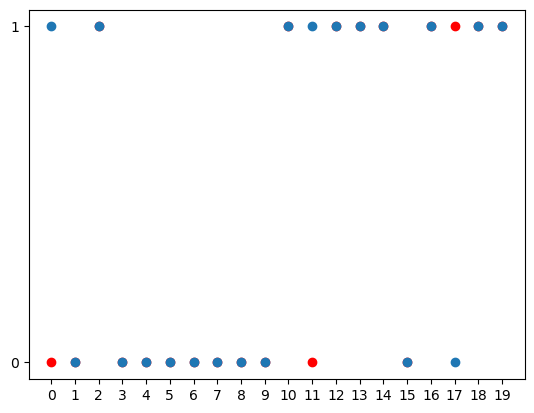

In [5]:
# Train the logistic regression model
model = LogisticRegression(lr=0.1, n_iters=1000)
model.fit(X_train, y_train, div = 10)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy_Lr = accuracy_score(y_test, y_pred)
print("Accuracy of Logestic regression:", accuracy_Lr)
plt.scatter(x=list(range(len(y_test))),y=y_test,color='r')
plt.scatter(x=list(range(len(y_test))),y=y_pred)
plt.xticks(list(range(len(y_test))))
plt.yticks([0,1])
plt.show()

Accuracy of LDA over test dataset: 85.0 %


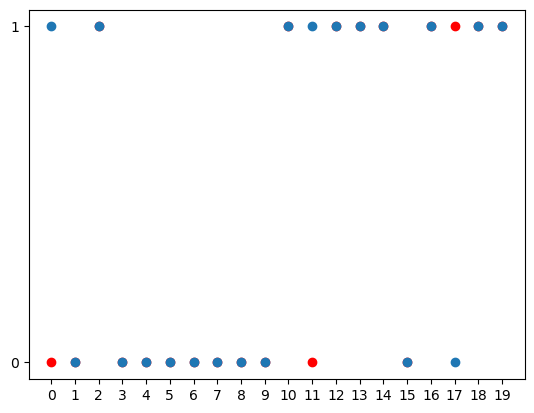

In [6]:
# Initialize an instance of the LDA class and fit it on the training data
lda = LDA()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
# Calculate the accuracy of the model using the accuracy_score function
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
lda_acc = accuracy
print("Accuracy of LDA over test dataset:", accuracy*100,'%')
plt.scatter(x=list(range(len(y_test))),y=y_test,color='r')
plt.scatter(x=list(range(len(y_test))),y=y_pred)
plt.xticks(list(range(len(y_test))))
plt.yticks([0,1])
plt.show()

Accuracy: 85.00%
Loss: 0.48750000000000004, Accuracy: 0.5125
Loss: 0.13749999999999996, Accuracy: 0.8625
Loss: 0.16249999999999998, Accuracy: 0.8375
Loss: 0.13749999999999996, Accuracy: 0.8625
Loss: 0.15000000000000002, Accuracy: 0.85
Loss: 0.15000000000000002, Accuracy: 0.85
Loss: 0.13749999999999996, Accuracy: 0.8625
Loss: 0.13749999999999996, Accuracy: 0.8625
Loss: 0.15000000000000002, Accuracy: 0.85
Loss: 0.13749999999999996, Accuracy: 0.8625
Perceptron accuracy: 0.8


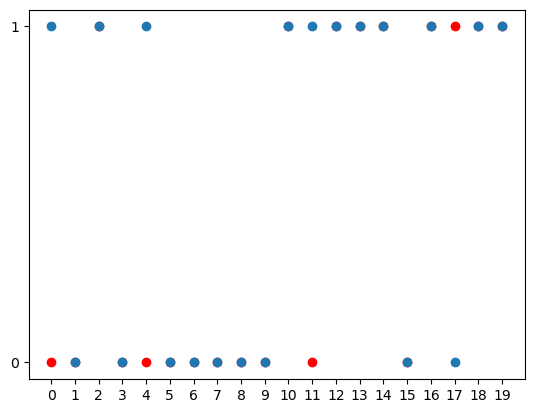

In [7]:
# Calculate the accuracy
accuracy_LDA = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy_LDA*100))

# Train the Perceptron model on the transformed training data
perceptron = Perceptron(lr=0.1, n_iters=100)
perceptron.fit(X_train, y_train, div=10)

# Predict the class labels for the transformed test data
y_pred = perceptron.predict(X_test)

# Calculate the accuracy of the Perceptron model on the transformed test data
accuracy_p = accuracy_score(y_test, y_pred)
print("Perceptron accuracy:", accuracy_p)
plt.scatter(x=list(range(len(y_test))),y=y_test,color='r')
plt.scatter(x=list(range(len(y_test))),y=y_pred)
plt.xticks(list(range(len(y_test))))
plt.yticks([0,1])
plt.show()

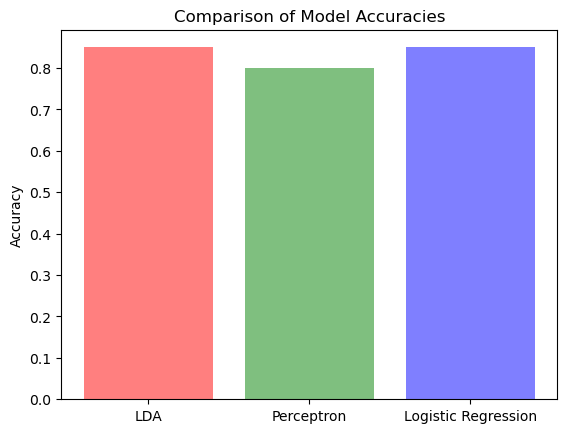

In [8]:
# create a bar plot
fig, ax = plt.subplots()
x_labels = ['LDA', 'Perceptron', 'Logistic Regression']
x_pos = np.arange(len(x_labels))
accs = [accuracy_LDA, accuracy_p, accuracy_Lr]
colors = ['red', 'green', 'blue']
ax.bar(x_pos, accs, align='center', alpha=0.5, color=colors)
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels)
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Model Accuracies')

plt.show()

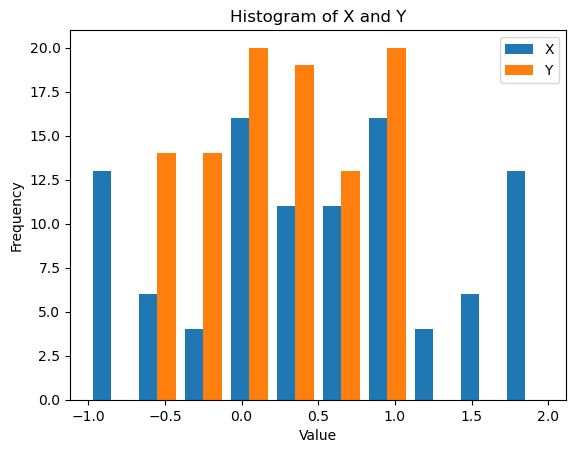

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset into pandas dataframe
data = pd.read_csv('project1_1.csv')

# Split data into features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

plt.hist([df['X'], df['Y']], bins=10, label=['X', 'Y'])
plt.legend(loc='upper right')
plt.title('Histogram of X and Y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

##### Workflow that can be followed for preprocessing and feature engineering:

Import the necessary libraries and packages, such as NumPy, Pandas, and Scikit-Learn.

Load the dataset into a Pandas DataFrame.

Check for missing values and handle them appropriately. This could involve imputing missing values or removing rows/columns with missing values.

Check for outliers and handle them appropriately. This could involve removing outliers or transforming the data using methods such as log transformation or winsorization.

Check for multicollinearity between the independent variables. Multicollinearity occurs when two or more independent variables are highly correlated with each other. This can be detected using methods such as correlation matrices or variance inflation factors (VIFs). If multicollinearity is detected, the variables can be combined or one of them can be removed.

Feature engineering involves creating new features from the existing ones that may improve the model's predictive power. This could involve scaling or standardizing the data, creating interaction terms between variables, or creating polynomial features.

Once the data is preprocessed and feature engineered, split the data into training and testing sets using Scikit-Learn's train_test_split function.

Fit the linear regression model on the training set using Scikit-Learn's LinearRegression class.

Evaluate the model's performance on the testing set using metrics such as mean squared error (MSE) or R-squared.

If the model's performance is not satisfactory, revisit the preprocessing and feature engineering steps to see if any improvements can be made.

Accuracy on training data: 0.9
Perceptron accuracy (train data): 0.8571428571428571
Logistic Regression accuracy (train): 0.9


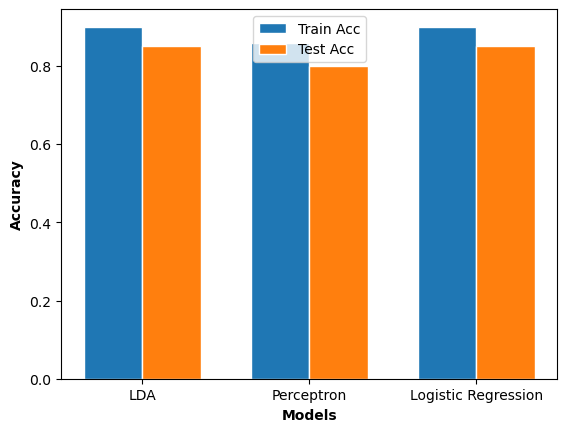

In [10]:
data = pd.read_csv('project1_1.csv')

# Split data into features and target variable
X = data[["X", "Y"]].values
y = data["Class"].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Initialize an instance of the LDA class and fit it on the training data
lda = LDA()
lda.fit(X_train, y_train)
# Predict the labels of the training data
y_train_pred = lda.predict(X_train)

# Calculate the accuracy of the model on the training data
accuracy_train_lda= accuracy_score(y_train, y_train_pred)

# Predict the labels of the test data
y_test_pred = lda.predict(X_test)

# Calculate the accuracy of the model on the test data
accuracy_test_lda = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print("Accuracy on training data:", accuracy_train_lda)


# Predict the class labels for the transformed train data
y_train_pred = perceptron.predict(X_train)

# Calculate the accuracy of the Perceptron model on the transformed train data
accuracy_train_p = accuracy_score(y_train, y_train_pred)
print("Perceptron accuracy (train data):", accuracy_train_p)

y_pred_train = model.predict(X_train)

# Calculate the accuracy of the model on the transformed training data
accuracy_train_lr = accuracy_score(y_train, y_pred_train)
print("Logistic Regression accuracy (train):", accuracy_train_lr)


# Example data
models = ['LDA', 'Perceptron', 'Logistic Regression']
train_acc = [accuracy_train_lda, accuracy_train_p, accuracy_train_lr]  # Replace with actual train accuracies
test_acc = [lda_acc, accuracy_p, accuracy_Lr]  # Replace with actual test accuracies

# Set width of bars
bar_width = 0.35

# Set positions of bars on x-axis
r1 = np.arange(len(train_acc))
r2 = [x + bar_width for x in r1]

# Plot bars
plt.bar(r1, train_acc, color='tab:blue', width=bar_width, edgecolor='white', label='Train Acc')
plt.bar(r2, test_acc, color='tab:orange', width=bar_width, edgecolor='white', label='Test Acc')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(train_acc))], models)

# Add y-axis label and legend
plt.ylabel('Accuracy', fontweight='bold')
plt.legend()

# Show plot
plt.show()